In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub


# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/alzheimers-disease-dataset")


print("Path to dataset files:", path)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/franek/.cache/kagglehub/datasets/rabieelkharoua/alzheimers-disease-dataset/versions/1


In [ ]:
files = os.listdir(path)
print("Content of", files)

csv_file = files[0]
csv_path = os.path.join(path, csv_file)

# Display the content of dataset
data = pd.read_csv(csv_path)

data.head(5)

Content of ['alzheimers_disease_data.csv']


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [9]:
# Divide the dataset into manually 
# selected classes based on feature groups
classes_dict = {
    "Demografic_Details": ["Age", "Gender", "Ethnicity", "EducationLevel"],
    "Lifestyle_Factors": [
        "BMI",
        "Smoking",
        "AlcoholConsumption",
        "PhysicalActivity",
        "DietQuality",
        "SleepQuality",
    ],
    "Medical_History": [
        "FamilyHistoryAlzheimers",
        "CardiovascularDisease",
        "Diabetes",
        "Depression",
        "HeadInjury",
        "Hypertension",
    ],
    "Clinical_Measurements": [
        "SystolicBP",
        "DiastolicBP",
        "CholesterolTotal",
        "CholesterolLDL",
        "CholesterolHDL",
        "CholesterolTriglycerides",
    ],
    "Congnitive_and_Functional_Assements": [
        "MMSE",
        "FunctionalAssessment",
        "MemoryComplaints",
        "BehavioralProblems",
        "ADL",
    ],
    "Symptoms": [
        "Confusion",
        "Disorientation",
        "PersonalityChanges",
        "DifficultyCompletingTasks",
        "Forgetfulness",
    ],
}

diagnosis = data["Diagnosis"]

class_data = {cls_name: data[params] for cls_name, params in classes_dict.items()}
print("Classes of parameters:\n")
for cls_name, _ in class_data.items():
    print(cls_name)

Classes of parameters:

Demografic_Details
Lifestyle_Factors
Medical_History
Clinical_Measurements
Congnitive_and_Functional_Assements
Symptoms


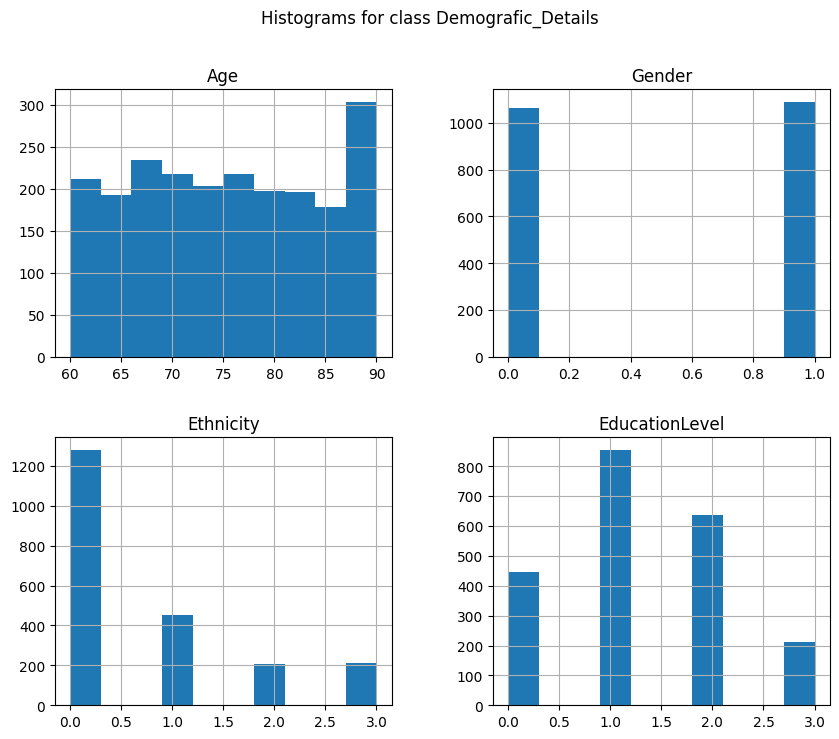

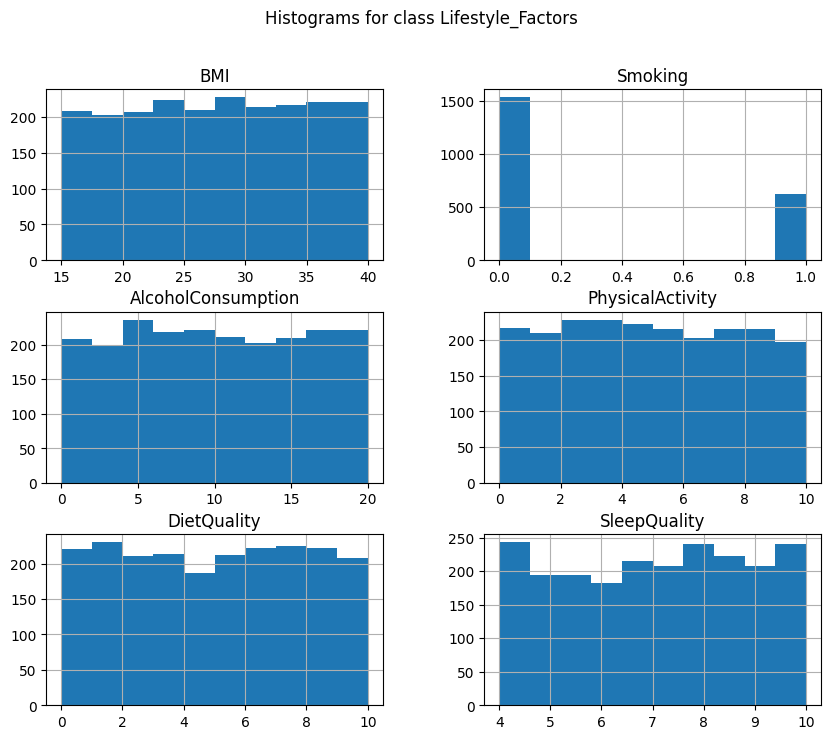

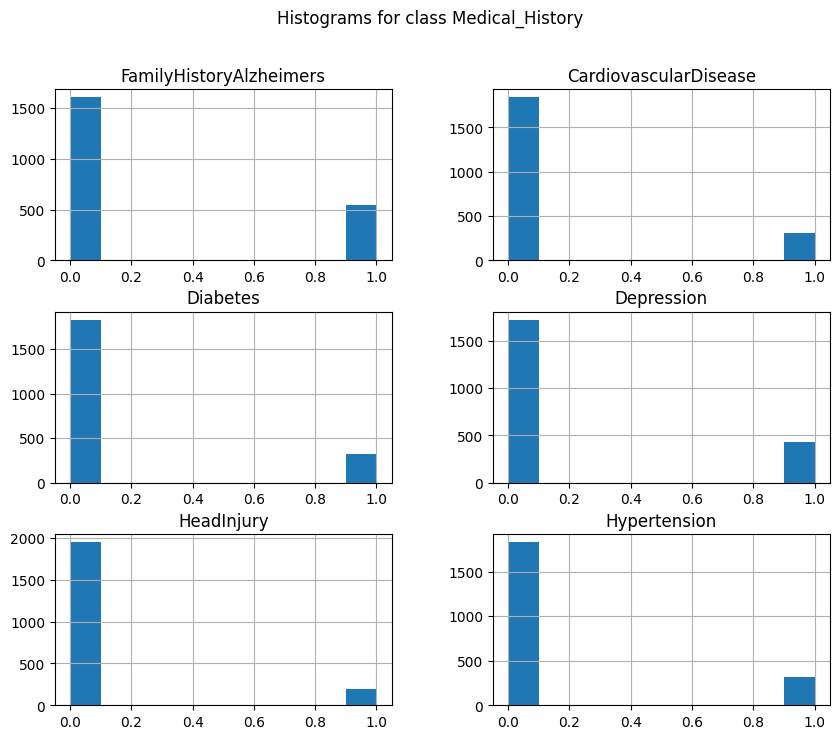

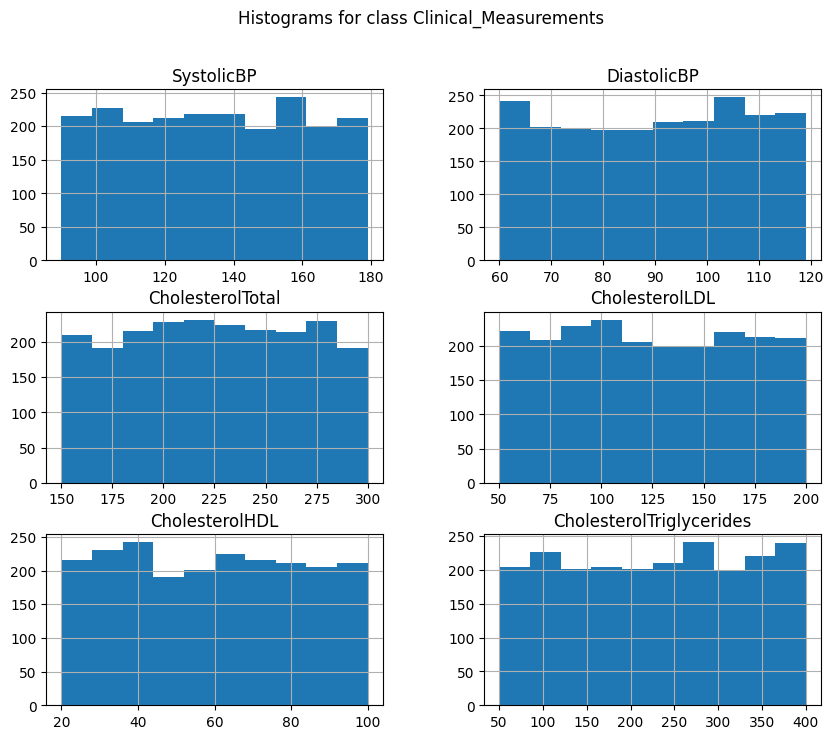

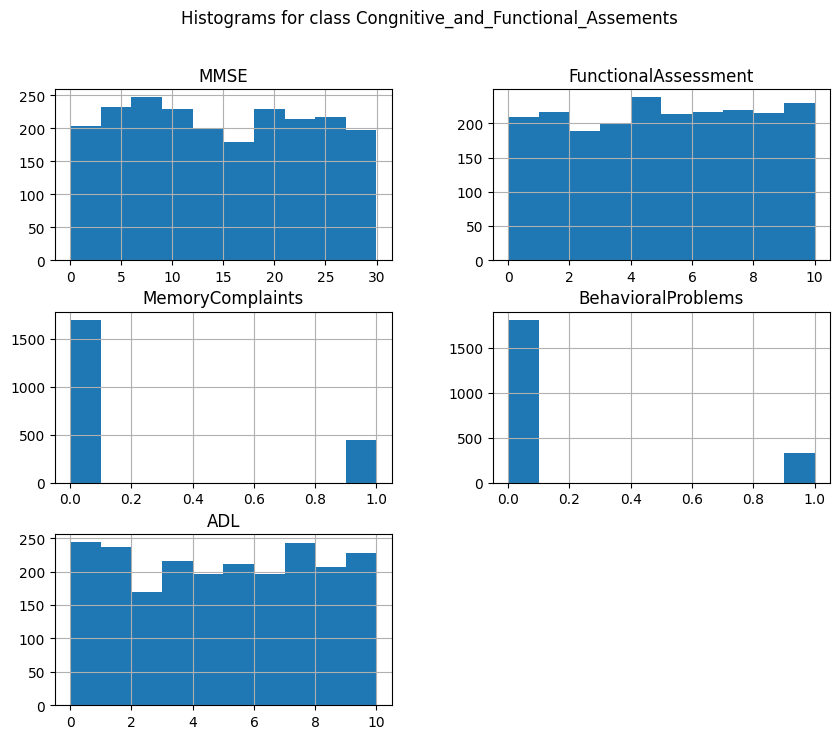

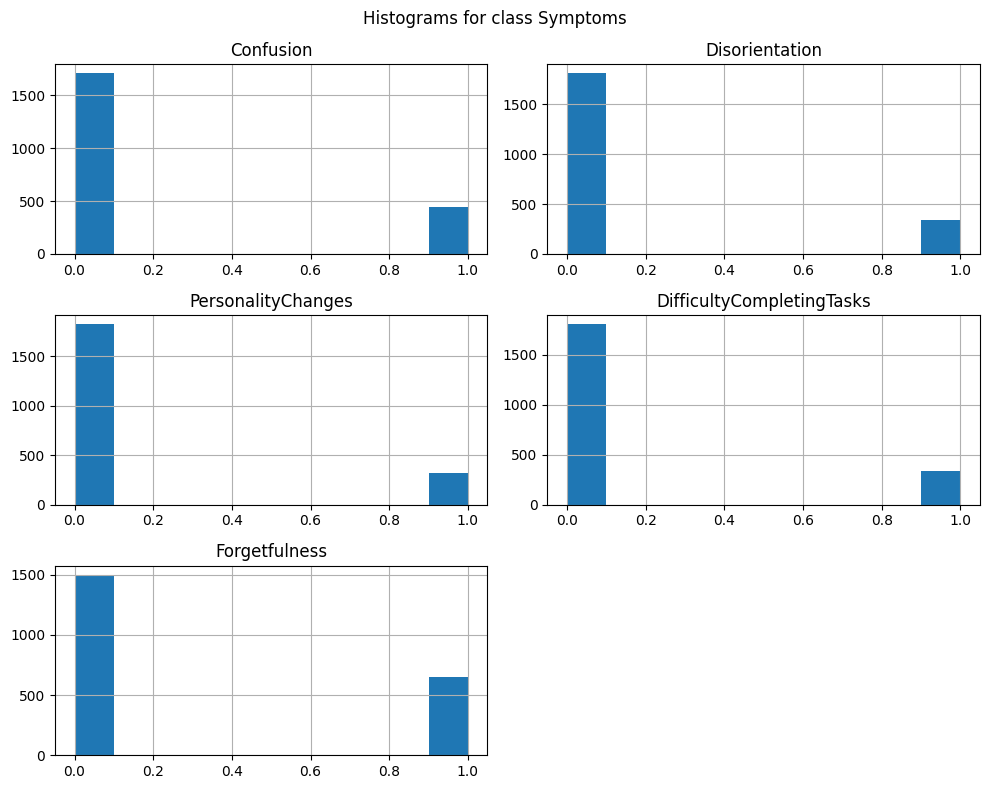

In [ ]:
# Plot histograms to visualize
# the shape of data for each selected class
for cls_name, cls_data in class_data.items():
    cls_data.hist(figsize=(10, 8))
    plt.suptitle(f"Histograms for class {cls_name}")
plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Histogram for Diagnosed')

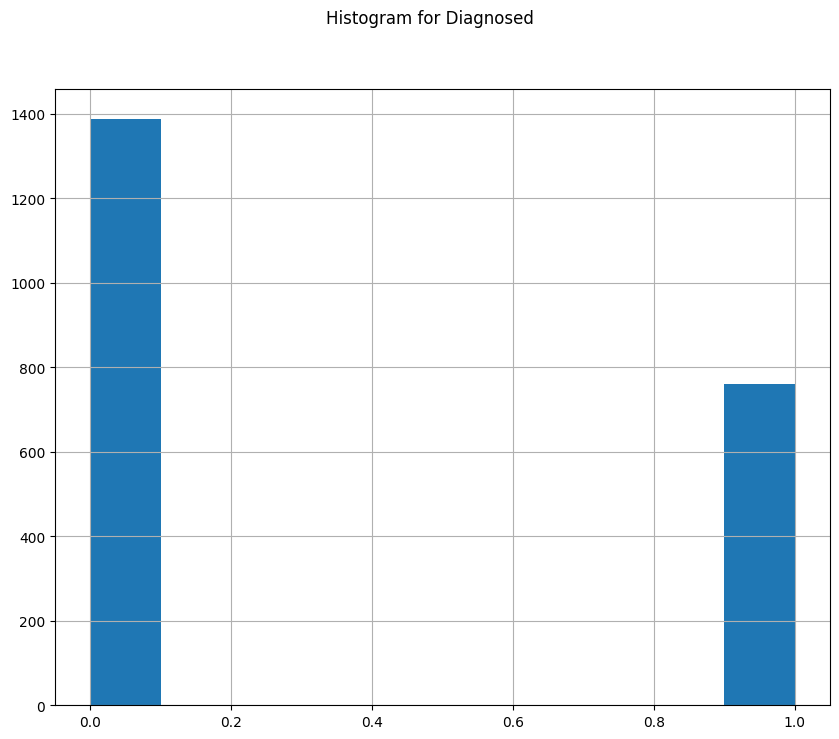

In [ ]:
# Plot a histogram to visualize
# the distribution of the 'Diagnosed"
diagnosis.hist(figsize=(10, 8))
plt.suptitle(f"Histogram for Diagnosed")
plt.show()